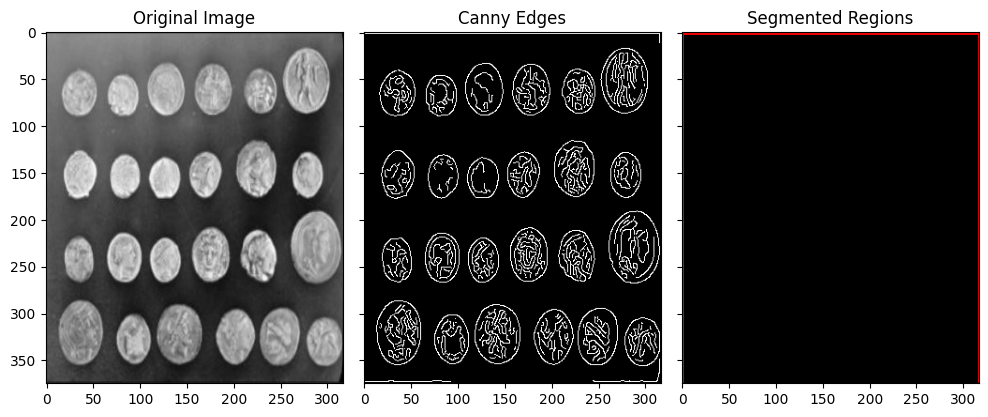

In [14]:
import cv2
import numpy as np
from skimage import data, color 
from skimage.feature import canny 
from skimage.filters import sobel
from skimage.segmentation import watershed 
from skimage.measure import label, regionprops 
import matplotlib.pyplot as plt
gray_image = cv2.imread('./1.jpg', cv2.IMREAD_GRAYSCALE)
 
edges = canny(gray_image)
markers = np.zeros_like(gray_image)
markers[gray_image < 0.4] = 1 # Background markers 
markers[gray_image > 0.7] = 2 # Foreground markers 
segmented = watershed(sobel(gray_image), markers) 
label_image = label(segmented)
regions = regionprops(label_image)
fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharex=True, sharey=True) 
ax = axes.ravel()
ax[0].imshow(gray_image, cmap=plt.cm.gray) 
ax[0].set_title("Original Image")
ax[1].imshow(edges, cmap=plt.cm.gray) 
ax[1].set_title("Canny Edges")
ax[2].imshow(segmented, cmap=plt.cm.nipy_spectral) 
ax[2].set_title("Segmented Regions")
for region in regions:
    minr, minc, maxr, maxc = region.bbox
    rect = plt.Rectangle((minc, minr), maxc - minc, maxr - minr, fill=False, 
                         edgecolor='red', linewidth=2)
    ax[2].add_patch(rect) 
plt.tight_layout() 
plt.show()